## Digits Identifier

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
%matplotlib inline 
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Image Data Shape (1797, 64)
Label Data Shape (1797,)


<Figure size 640x480 with 0 Axes>

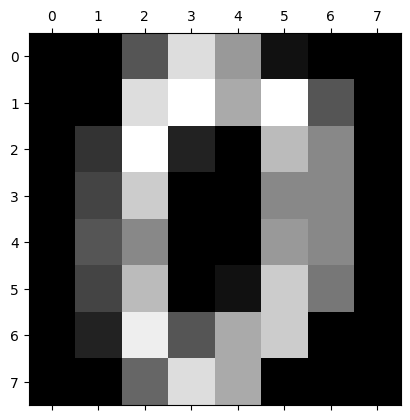

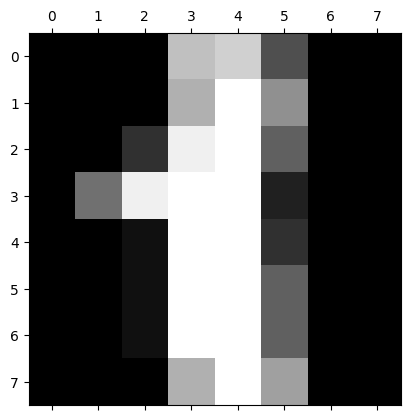

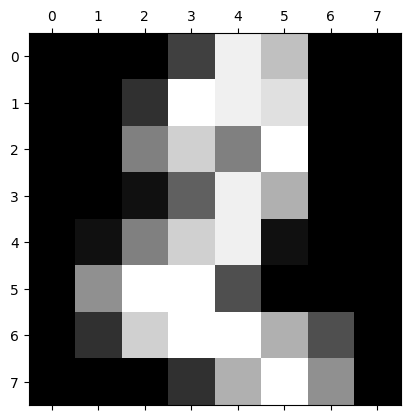

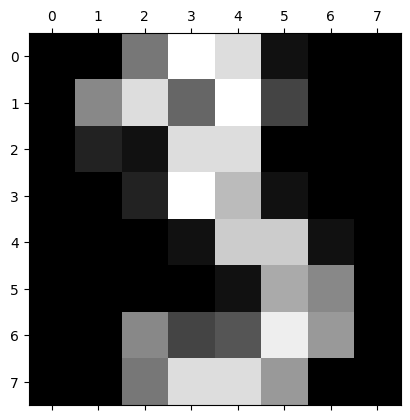

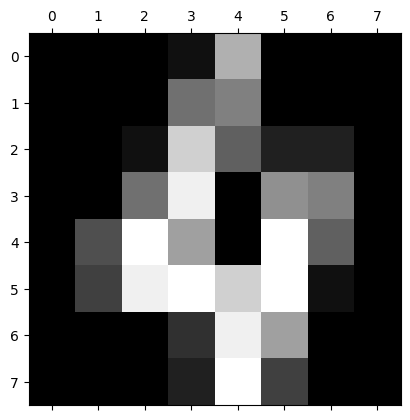

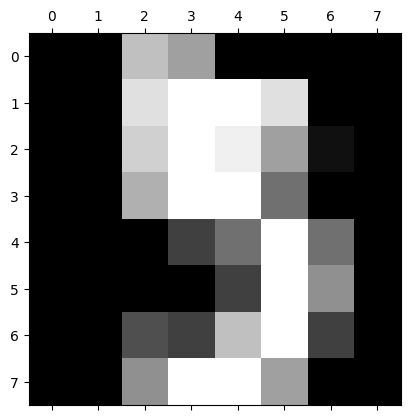

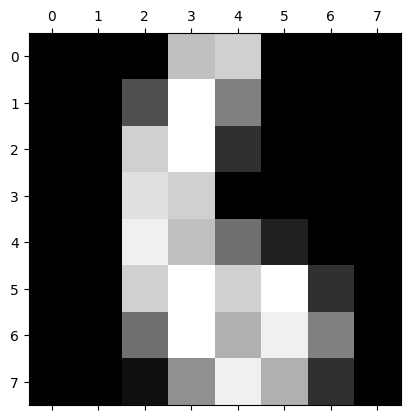

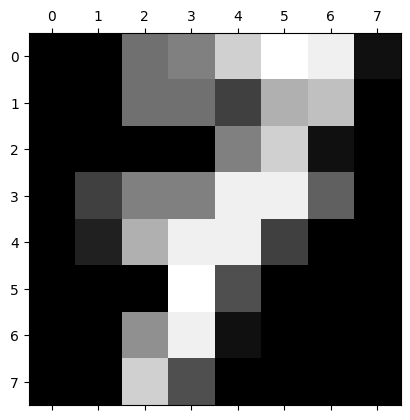

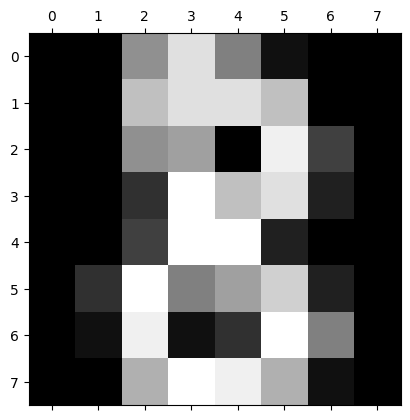

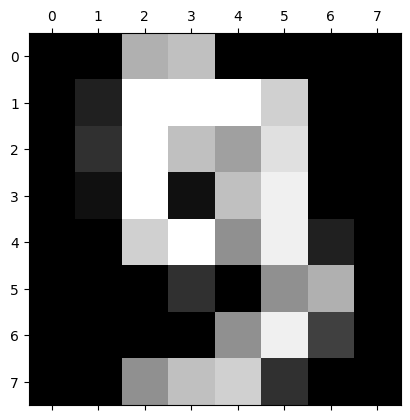

In [3]:
print("Image Data Shape",digits.data.shape)
print("Label Data Shape", digits.target.shape)    #8x8 =64 thats why 
digits.data[0]
plt.gray()
for i in range(0,10):
    plt.matshow(digits.images[i])

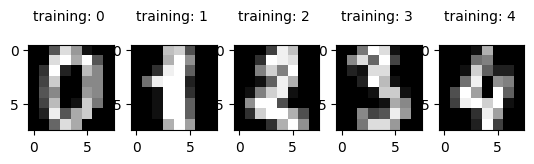

In [4]:
for index, (image,label) in enumerate(zip(digits.data[0:5] , digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training: %i \n' %label, fontsize=10)
    

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

In [6]:
print(X_train.shape)  #training features
print(X_test.shape)   #training labels
print(y_train.shape)    
print(y_train.shape)


(1437, 64)
(360, 64)
(1437,)
(1437,)


In [7]:
from sklearn.linear_model import LogisticRegression
Log_reg= LogisticRegression()
Log_reg.fit(X_train, y_train)

C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
print(Log_reg.predict(X_test[0].reshape(1,-1)))

[4]


In [9]:
Log_reg.predict(X_test[0:10])
pred=Log_reg.predict(X_test)
score=Log_reg.score(X_test,y_test)
score

0.9444444444444444

In [10]:
cm=metrics.confusion_matrix(y_test, pred)
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 41,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 25]])

Text(0.5, 1.0, 'Accuracy Score:0.9444444444444444')

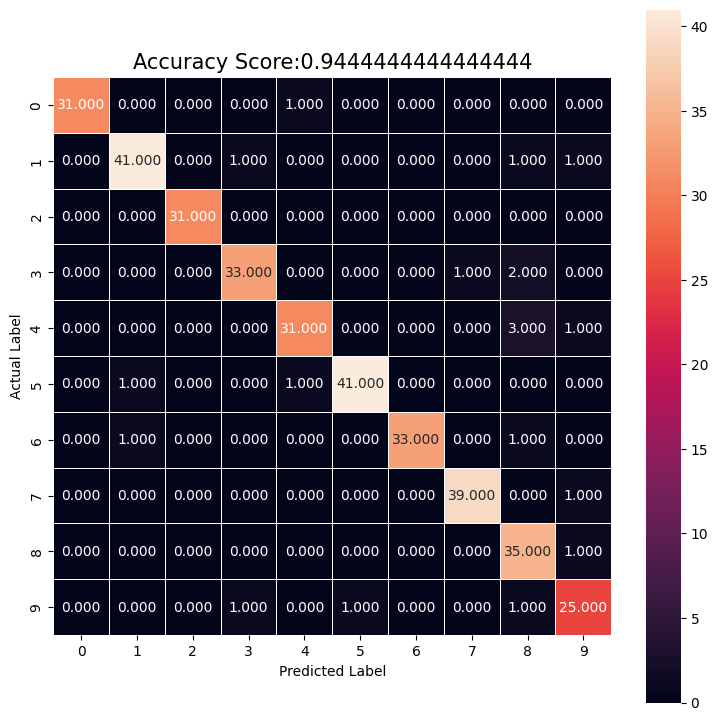

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f",linewidths=.5,square=True);
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=15)